In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [4]:
poke = pd.read_csv('pokemon.csv')
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
poke.rename(columns={'Type 1':'Primary_Type','Type 2':'Secondary_Type'},inplace=True)

In [6]:
poke.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
grass_poke = poke[poke['Primary_Type']=='Grass']

In [8]:
grass_poke.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False


In [9]:
fire_poke= poke[poke['Primary_Type']=='Fire']

In [10]:
fire_poke.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


<AxesSubplot:xlabel='Speed', ylabel='Count'>

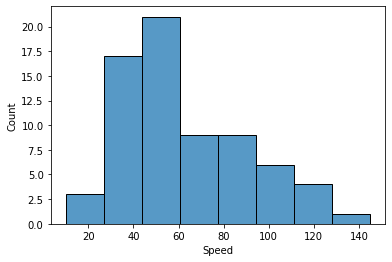

In [11]:
sns.histplot(grass_poke['Speed'])

In [12]:
grass_poke.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,344.871429,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143
std,200.264385,106.650626,19.516564,25.380520,24.485192,27.244864,21.446645,28.506456,1.579173
min,1.000000,180.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000,1.000000
25%,187.250000,318.500000,51.250000,55.000000,50.000000,57.000000,55.000000,40.000000,2.000000
50%,372.000000,430.000000,65.500000,70.000000,66.000000,75.000000,66.000000,58.500000,3.500000
75%,496.750000,497.000000,75.000000,93.500000,84.500000,99.500000,85.000000,80.000000,5.000000
max,673.000000,630.000000,123.000000,132.000000,131.000000,145.000000,129.000000,145.000000,6.000000


In [13]:
poke['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [14]:
x = poke[['Speed']]
y = poke[['Legendary']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[217,   1],
       [ 22,   0]], dtype=int64)

In [17]:
x = poke[['Defense']]
y= poke[['Attack']]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [19]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,x_train)

DecisionTreeRegressor()

In [20]:
y_pred = dtr.predict(x_test)

In [21]:
y_test.head()

,Attack
659,94
348,120
429,180
760,60
293,30


In [22]:
y_pred[0:5]

array([130.,  40.,  20.,  60.,  30.])

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y_test,y_pred)

1236.9916666666666

In [25]:
#Random Forest
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
poke = pd.read_csv('pokemon.csv')
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [26]:
poke.shape

(800, 13)

C:\Users\rohit\AppData\Local\Temp\ipykernel_13952\2023219624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(poke['HP'])


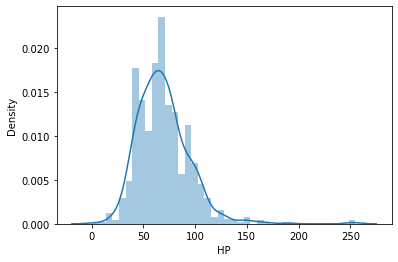

In [27]:
sns.distplot(poke['HP'])
plt.show()

In [28]:
poke.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [29]:
poke['Attack'].value_counts()

100    40
65     39
50     37
80     37
85     33
       ..
46      1
190     1
106     1
132     1
33      1
Name: Attack, Length: 111, dtype: int64

In [30]:
poke['Sp. Atk'].value_counts().values

array([51, 49, 44, 39, 35, 33, 30, 29, 27, 27, 27, 27, 24, 21, 20, 18, 16,
       14, 13, 11, 11,  9,  9,  8,  8,  8,  7,  7,  6,  6,  5,  5,  5,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1], dtype=int64)

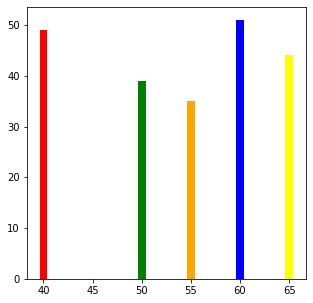

In [31]:
plt.figure(figsize=(5,5))
plt.bar(list(poke['Sp. Atk'].value_counts().keys()[0:5]),list(poke['Sp. Atk'].value_counts().values[0:5]),color=['blue','red','yellow','green','orange'])
plt.show()

In [32]:
poke['Sp. Atk'].value_counts().keys()

Int64Index([ 60,  40,  65,  50,  55,  45,  70,  35,  85,  95,
            ...
             86,  38,  41,  64, 159,  78,  31, 194,  29, 175],
           dtype='int64', length=105)

In [33]:
poke['Sp. Atk'].value_counts().values

array([51, 49, 44, 39, 35, 33, 30, 29, 27, 27, 27, 27, 24, 21, 20, 18, 16,
       14, 13, 11, 11,  9,  9,  8,  8,  8,  7,  7,  6,  6,  5,  5,  5,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1], dtype=int64)

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(x_train,y_train)

C:\Users\rohit\AppData\Local\Temp\ipykernel_13952\1828188613.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfg.fit(x_train,y_train)


RandomForestRegressor()

In [35]:
y_pred = rfg.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error
